In [4]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self, X,y):
        self.w_ = np.zeros(1 +X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X,y):
                update = self.eta * (target-self.predict(Xi))
                self.w_[1:] += update*Xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0,1,-1)

In [17]:
data = sns.load_dataset('iris')

In [18]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
y = data.iloc[0:100,4].values
y = np.where(y == 'setosa', -1, 1)
X = data.iloc[0:100,[0,2]].values

In [39]:
model = Perceptron(eta=0.1,n_iter=10)
model.fit(X,y)

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


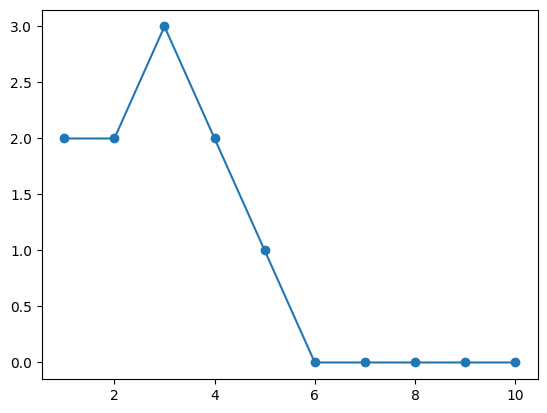

In [40]:
print(model.errors_)
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.show()

In [41]:
pre = model.predict(X)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y , pre)

1.0

In [62]:
class Adaline(object):
    
    def __init__(self, eta, epochs):
        ##Learing rate
        self.eta = eta
        ##Iteration
        self.epochs = epochs
    def fit(self, X, y):
        ##Assiging the weights to zero
        self.weights = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.epochs):
            #fordward propagation
            output = self.net_input(X)
            #calculating errors
            errors = (y - output)
            #Addinging the weights
            self.weights[1:] += self.eta * X.T.dot(errors)
            self.weights[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
       #multiplication
       return np.dot(X, self.weights[1:]) + self.weights[0]
    ##Activation function
    def activation(self, X):
        return self.net_input(X)
    ## Predictiong the value of X
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [63]:


ada2 = Adaline(epochs = 1000, eta = 0.01).fit(X,y)


/var/folders/_h/57lq9q7j333144ybnyl0hz280000gn/T/ipykernel_91261/1356024111.py:20: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
/var/folders/_h/57lq9q7j333144ybnyl0hz280000gn/T/ipykernel_91261/1356024111.py:18: RuntimeWarning: invalid value encountered in add
  self.weights[1:] += self.eta * X.T.dot(errors)


In [65]:
ada1.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])